In [1]:
import sys
import os

# Add the project root to the path so we can import from 'src'
sys.path.append(os.path.abspath(os.path.join('../')))

from src.data_loader import DataLoader

# Initialize the loader (default dir is ../data/raw)
loader = DataLoader()

In [2]:
fraud_data = loader.load_csv('Fraud_data.csv')
print(fraud_data.head())

2025-12-22 09:20:31,266 - INFO - Loading data from ../data/raw\Fraud_data.csv...
2025-12-22 09:20:31,719 - INFO - Successfully loaded Fraud_data.csv with shape (151112, 11)


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [3]:
ip_data = loader.load_csv('ipAddress_to_Country.csv')
print(ip_data.head())


2025-12-22 09:20:34,358 - INFO - Loading data from ../data/raw\ipAddress_to_Country.csv...
2025-12-22 09:20:34,435 - INFO - Successfully loaded ipAddress_to_Country.csv with shape (138846, 3)


   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China


In [4]:
print("\n--- fraud_data Shape ---")
print(fraud_data.shape)

print("\n--- fraud_data Info (Types and Nulls) ---")
print(fraud_data.info())
print("\n--- ip_data Shape ---")
print(ip_data.shape)
print("\n--- ip_data Info (Types and Nulls) ---")
print(ip_data.info())


--- fraud_data Shape ---
(151112, 11)

--- fraud_data Info (Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

--- ip_data Shape ---
(138846, 3)

--- ip_data Info (Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 

In [5]:
print("Missing values per column:\n", fraud_data.isnull().sum())
print("Missing values per column:\n", ip_data.isnull().sum())

Missing values per column:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values per column:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [6]:
duplicate_count = fraud_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [7]:
import  pandas as pd
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

2025-12-22 09:20:57,005 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Abenezer\AppData\Local\Temp\ipykernel_27036\2935076244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=fraud_data, palette='viridis')
2025-12-22 09:20:57,114 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


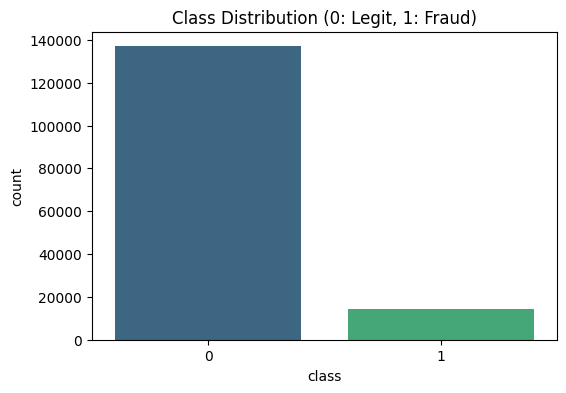

Legit transactions: 90.64%
Fraudulent transactions: 9.36%


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_data, palette='viridis')
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()

imbalance_ratio = fraud_data['class'].value_counts(normalize=True)
print(f"Legit transactions: {imbalance_ratio[0]*100:.2f}%")
print(f"Fraudulent transactions: {imbalance_ratio[1]*100:.2f}%")

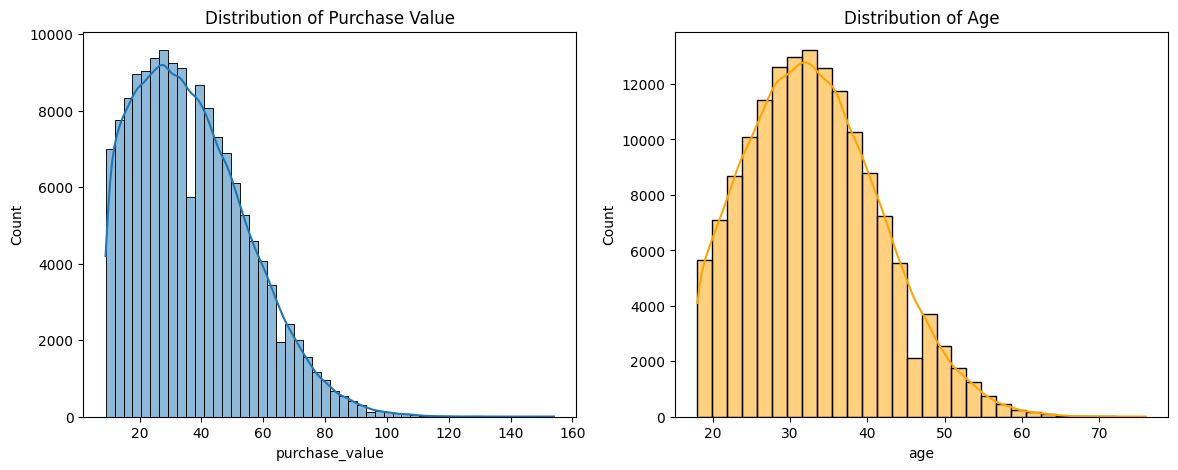

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase Value Distribution
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Purchase Value')

# Age Distribution
sns.histplot(fraud_data['age'], bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Age')

plt.show()

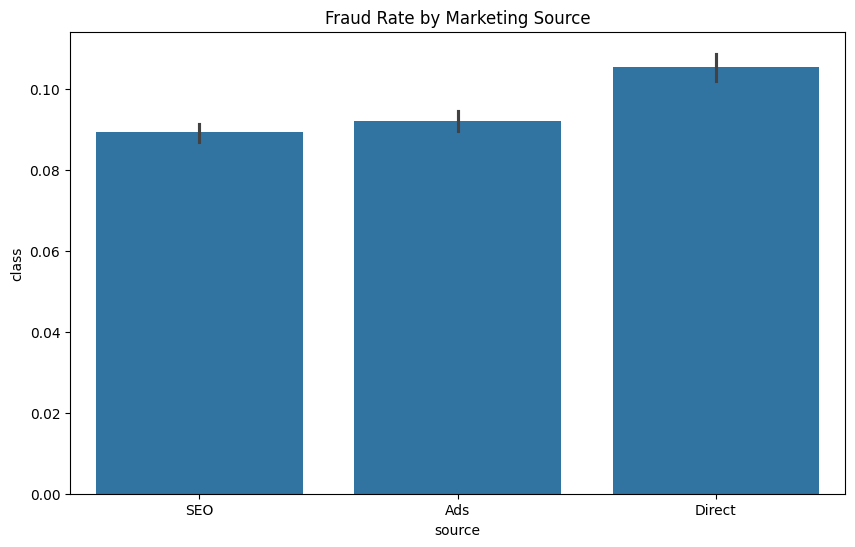

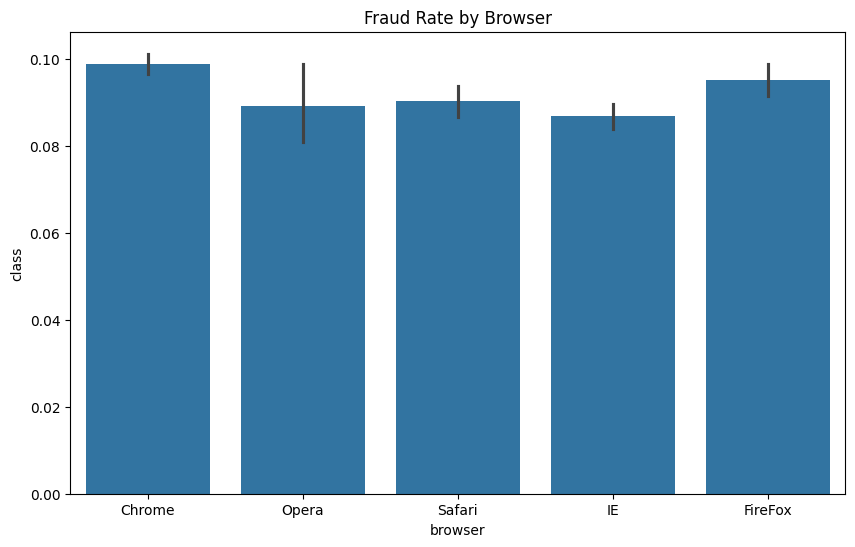

In [10]:
# Fraud rate by Source
plt.figure(figsize=(10,6))
sns.barplot(x='source', y='class', data=fraud_data)
plt.title('Fraud Rate by Marketing Source')
plt.show()

# Fraud rate by Browser
plt.figure(figsize=(10,6))
sns.barplot(x='browser', y='class', data=fraud_data)
plt.title('Fraud Rate by Browser')
plt.show()

In [11]:
print("Raw IP Column Type:", fraud_data['ip_address'].dtype)
print("First 5 Raw IP values:", fraud_data['ip_address'].head().tolist())

Raw IP Column Type: float64
First 5 Raw IP values: [732758368.79972, 350311387.865908, 2621473820.11095, 3840542443.91396, 415583117.452712]


In [12]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype(float).astype('int64')

In [13]:
print("Raw IP Column Type:", fraud_data['ip_address'].dtype)
print("First 5 Raw IP values:", fraud_data['ip_address'].head().tolist())

Raw IP Column Type: int64
First 5 Raw IP values: [732758368, 350311387, 2621473820, 3840542443, 415583117]


In [ ]:
import numpy as np
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype('int64')
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype('int64')

# Sort for merge_asof
fraud_data = fraud_data.sort_values('ip_address')
ip_data = ip_data.sort_values('lower_bound_ip_address')

# Range-based merge
merged_df = pd.merge_asof(
    fraud_data, 
    ip_data, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address', 
    direction='backward'
)

# Validate: IP must be <= upper_bound
merged_df['country'] = np.where(
    (merged_df['ip_address'] >= merged_df['lower_bound_ip_address']) & 
    (merged_df['ip_address'] <= merged_df['upper_bound_ip_address']), 
    merged_df['country'], 
    'Unknown'
)

# Verify results
print("\nCheck merged data:")
print(merged_df[['user_id', 'ip_address', 'country']].head())

print("\nFraud count per country (Top 5):")
print(merged_df[merged_df['country'] != 'Unknown'].groupby('country')['class'].sum().sort_values(ascending=False).head())


Check merged data:
   user_id  ip_address  country
0    62421       52093  Unknown
1   173212       93447  Unknown
2   242286      105818  Unknown
3   370003      117566  Unknown
4   119824      131423  Unknown

Fraud count per country (Top 5):
country
United States        5551
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Name: class, dtype: int64


In [18]:
print("\nCheck merged data:")
print(merged_df[['user_id', 'ip_address', 'country']].tail())
print(merged_df[merged_df['country'] != 'Unknown'].groupby('country')['class'].sum().sort_values(ascending=False))
country_counts = merged_df['country'].value_counts()
print(country_counts)

# To specifically see only 'Unknown'
print(f"\nNumber of Unknowns: {country_counts.get('Unknown', 0)}")


Check merged data:
        user_id  ip_address  country
151107   361167  4294673680  Unknown
151108    62422  4294714854  Unknown
151109   260255  4294719533  Unknown
151110   172984  4294822241  Unknown
151111   168001  4294850499  Unknown
country
United States        5551
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
                     ... 
Uganda                  0
Vanuatu                 0
Yemen                   0
Zambia                  0
Zimbabwe                0
Name: class, Length: 181, dtype: int64
country
United States                     58049
Unknown                           21966
China                             12038
Japan                              7306
United Kingdom                     4490
                                  ...  
Dominica                              1
Gambia                                1
Vanuatu                               1
British Indian Ocean Territory        1
Nauru            

In [19]:
# Ensure datetime format
merged_df['signup_time'] = pd.to_datetime(merged_df['signup_time'])
merged_df['purchase_time'] = pd.to_datetime(merged_df['purchase_time'])

# 1. time_since_signup (Duration between signup and purchase)
merged_df['time_since_signup'] = (merged_df['purchase_time'] - merged_df['signup_time']).dt.total_seconds()

# 2. Time-based features
merged_df['hour_of_day'] = merged_df['purchase_time'].dt.hour
merged_df['day_of_week'] = merged_df['purchase_time'].dt.dayofweek

# 3. Transaction Frequency (Velocity)
# Count how many times the same device_id appeared
merged_df['device_usage_count'] = merged_df.groupby('device_id')['user_id'].transform('count')

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify columns
categorical_features = ['source', 'browser', 'sex']
numerical_features = ['purchase_value', 'age', 'time_since_signup', 'device_usage_count', 'hour_of_day', 'day_of_week']

# 1. Encoding & Scaling (using ColumnTransformer for a clean pipeline)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Drop IDs and Target before transforming
X = merged_df.drop(['class', 'user_id', 'device_id', 'ip_address', 'signup_time', 'purchase_time', 'lower_bound_ip_address', 'upper_bound_ip_address'], axis=1)
y = merged_df['class']

# Note: We don't transform yet; we do it after the split to avoid data leakage

In [24]:
import sklearn
import imblearn
print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

scikit-learn version: 1.8.0
imbalanced-learn version: 0.14.1


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Split Data FIRST (Vital to prevent leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2. Apply preprocessing to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Document distribution BEFORE SMOTE
print("Before SMOTE distribution:", np.bincount(y_train))

# 4. Apply SMOTE to Training Data ONLY
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_processed, y_train)

# 5. Document distribution AFTER SMOTE
print("After SMOTE distribution:", np.bincount(y_train_resampled))

Before SMOTE distribution: [109568  11321]
After SMOTE distribution: [109568 109568]
